# Project: Investigate a Dataset - [No-show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

1. ‘ScheduledDay’ tells us on what day the patient set up their appointment.
2. ‘Neighborhood’ indicates the location of the hospital.
3. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
4. The encoding of the 'no_show' column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
5. 'AppointmentDay' tells us on what day the patient fixed their appointment.


### Question(s) for Analysis
1. What is the percentage of patients who miss appointments?, is this percentage a cause for concern?
2. Does number of days between scheduling and appointment affect possibility of showing up?
3. Does sending sms to patients improve chances of them showing up?
4. Does day of the week of appointment affect chances of showing up?
5. Does the age of a patient show a measure of probability for showing up?
6. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [185]:
# import relevant packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [186]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [187]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Observations
1. Certain columns are irrelevant to the questions posed for this analysis, so they would be dropped to reduced the size of the data and save on computing resources. Columns: (patientid, appointmentid, and neighbourhood).
2. Column names are not in the recommended conventional small letters. 
3. Columns with double word names should be separated by “_”.
4. The hyphen separation in “no-show” column should be changed to “_”. 
5. There are spelling mistakes in certain columns (hipertension and handcap)


In [188]:
#check the size of the dataset 
df.shape

(110527, 14)

> **The dataset has 110,527 rows of data and 14 columns**

In [189]:
#check for duplicates 
df.duplicated().sum()

0

> **The data set has no duplicated rows**

In [190]:
#check for features with missing values
df.isnull().any().sum()

0

> **There are no null values in the dataset**

In [191]:
#confirmation of no null values across features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [192]:
#check the data types of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Observations
1. AppointmentDay is a string and needs to be converted to datetime format
2. ScheduledDay is a string and needs to be converted to datetime format
3. No-show column which is an "outcome" column is a string so we would need to create a numeric copy of that column by mapping "yes or no" to "1 or 0". 

All other columns have no issues with data type

In [193]:
#number of non-null unique values for features in each dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> **observation shows that some patients have made multiple appointments because nunique of PatientId is lower than nunique of AppointmentID**

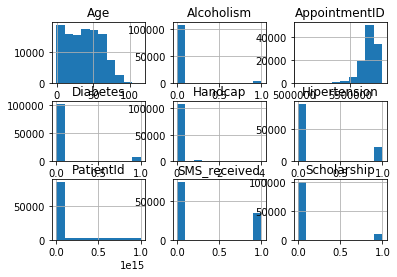

In [194]:
#check distribution of features in the dataset
df.hist();

> **A close look at age column distribution shows that there are some age entries with value of "0", these rows should be removed**


### Data Cleaning
> **Column names**: 
 

In [195]:
# convert column names to small letters and preview to confirm changes
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [196]:
#rename columns and preview to confirm changes
df.rename(columns={'scheduledday': 'scheduled_day', 'appointmentday':'appointment_day', 
                   'patientid':'patient_id', 'appointmentid':'appointment_id', 
                   'no-show':'no_show', 'hipertension':'hypertension', 'handcap':'handicap'}, inplace=True)

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [197]:
#drop irrelevant columns (patientid and appointmentid, neighbourhood) and preview to confirm changes
df.drop(['appointment_id', 'patient_id', 'neighbourhood'], axis=1, inplace=True)
df.head()

,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


> **Data Alterations:**

In [198]:
#convert date columns to appropriate format and confrim modified data types
cols_4_datetime = ['scheduled_day', 'appointment_day']
df[cols_4_datetime] = df[cols_4_datetime].apply(pd.to_datetime)
df.dtypes

gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
dtype: object

> **scheduled_day and appointment_day now have appropriate data types**

In [199]:
#Create column for day of the week(needed for analysis question 2)
df['apt_dow'] = df['appointment_day'].dt.day_name()
#Create column for number of days difference(needed for analysis question 2)
df['apt_gap'] = (df['appointment_day'] - df['scheduled_day']).dt.days
#confirm changes
df.head()

,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,apt_dow,apt_gap
0,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,No,Friday,-1
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,No,Friday,-1
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,No,Friday,-1
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,No,Friday,-1
4,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,No,Friday,-1


> **There is an observation that "apt_gap" has some negative values, so those rows need to be dropped**

In [200]:
#use nesting to implement vectorized if-else to create column for no_show with numeric values
df['no_show_numeric'] = np.where(df['no_show'] == 'No', 0, 1)
df.head()

,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,apt_dow,apt_gap,no_show_numeric
0,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,No,Friday,-1,0
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,No,Friday,-1,0
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,No,Friday,-1,0
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,No,Friday,-1,0
4,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,No,Friday,-1,0


In [201]:
#Drop appointment day and scheduled day as it is no longer needed
df.drop(['appointment_day', 'scheduled_day'], axis=1, inplace=True)

#Drop rows where appoint day gap = -1 as that is faulty data and rows where age == 0
#select location where the above conditions apply
df_drop_index= np.where((df['apt_gap'] < 0 ) | (df['age'] <= 0))[0]

#drop selected rows
df.drop(df_drop_index, axis=0, inplace=True)

df.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,apt_dow,apt_gap,no_show_numeric
5,F,76,0,1,0,0,0,0,No,Friday,1,0
6,F,23,0,0,0,0,0,0,Yes,Friday,1,1
7,F,39,0,0,0,0,0,0,Yes,Friday,1,1
9,F,19,0,0,0,0,0,0,No,Friday,1,0
10,F,30,0,0,0,0,0,0,No,Friday,1,0


<a id='eda'></a>
## Exploratory Data Analysis



### 1. What is the percentage of patients who miss appointments?, is this percentage a cause for concern?

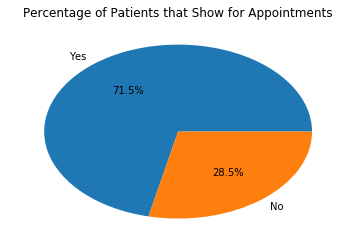

In [202]:
# Create a pie chart to show the percentage 
plot_array = [df.no_show_numeric.value_counts()[0], df.no_show_numeric.value_counts()[1]]
labels = ['Yes', 'No']
plt.pie(plot_array, labels = labels, autopct='%1.1f%%')
plt.title("Percentage of Patients that Show for Appointments");

> The plot above shows that a large majority of patients show up for their appointments, however a 28.5% appointmnent miss rate should be a cause for concern, hence a need to investigate and find a possible cause.

### 2. Does number of days between scheduling and appointment affect possibility of showing up?

In [203]:
#create masks to seperate data of those who showed up and those who didn't show up
df_show = df.query('no_show == "No"')
df_no_show = df.query('no_show == "Yes"')

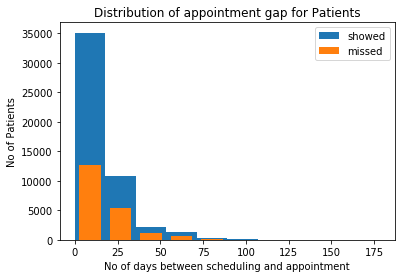

In [204]:
#plot distribution of appointment gap of patients for each response
plt.hist(df_show.apt_gap, label= 'showed')
plt.hist(df_no_show.apt_gap, rwidth=0.7, label= 'missed')
plt.xlabel('No of days between scheduling and appointment')
plt.ylabel('No of Patients')
plt.legend()
plt.title("Distribution of appointment gap for Patients");

> The distribution above doesn't show a clear distinction between patients that showed up and those that didn,t show up, hence no prediction can be made using this feature. A scatter plot would be used to verify this inference

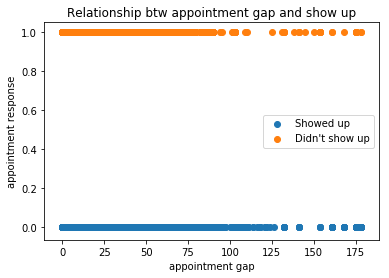

In [205]:
#scatter plot for appointment gap 
plt.scatter(df_show.apt_gap, df_show.no_show_numeric, label='Showed up')
plt.scatter(df_no_show.apt_gap, df_no_show.no_show_numeric, label="Didn't show up")
plt.title("Relationship btw appointment gap and show up")
plt.xlabel("appointment gap")
plt.ylabel("appointment response")
plt.legend();

> The scatter plot above also doess'nt show a reasonable distinction for prediction to be made based on this feature

### 3. Does sending sms to patients improve chances of them showing up?

In [206]:
#define function for plotting bar chart for columns with binary data
def bar_chart(column):
    plt.bar(['Yes', 'No'], [df_show[column].value_counts()[1],
                                   df_show[column].value_counts()[0]],
    label='Showed up')
    plt.bar(['Yes', 'No'], [df_no_show[column].value_counts()[1],
                                   df_no_show[column].value_counts()[0]],
    label="'Didn't Show up'", width=0.6)
    plt.title("Bar chart showing appointment responses for {}".format(column))
    plt.xlabel("{} status".format(column))
    plt.ylabel("appointment response")
    plt.legend();

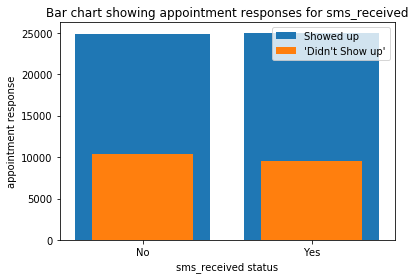

In [207]:
#create a plot for sms_received to show if it has an effect on patients showing up
bar_chart("sms_received")

> The plot above shows that sending sms to patients has little to no effect on the chances of them showing up as a similar response was gotten in both cases where sms was sent and wasn't sent

### 4. Does day of the week of appointment affect chances of showing up?

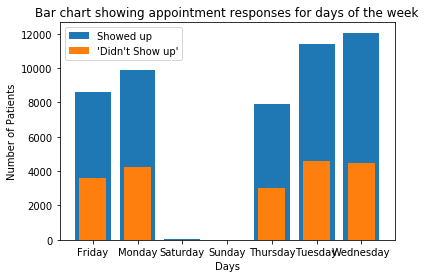

In [208]:
#create a bar plot for day of the week to see if there is a trend 
dow = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
fig1 = plt.bar(dow, [0,
              df_show.apt_dow.value_counts()[dow[1]],
              df_show.apt_dow.value_counts()[dow[2]],
              df_show.apt_dow.value_counts()[dow[3]],
              df_show.apt_dow.value_counts()[dow[4]],
              df_show.apt_dow.value_counts()[dow[5]],
              df_show.apt_dow.value_counts()[dow[6]]], label='Showed up')

fig1 = plt.bar(dow, [0,
              df_no_show.apt_dow.value_counts()[dow[1]],
              df_no_show.apt_dow.value_counts()[dow[2]],
              df_no_show.apt_dow.value_counts()[dow[3]],
              df_no_show.apt_dow.value_counts()[dow[4]],
              df_no_show.apt_dow.value_counts()[dow[5]],
              df_no_show.apt_dow.value_counts()[dow[6]]], label="'Didn't Show up'", width=0.6)

plt.title("Bar chart showing appointment responses for days of the week")
plt.xlabel("Days")
plt.ylabel("Number of Patients")
plt.legend();

> The bar chart above shows no observable trends as the ratio of showed_up to no_show_up is relatively close across all days of the week. Saturday seems to show that all patients on that day showed up, it would be great to do a confrimation by plotting for saturday alone.

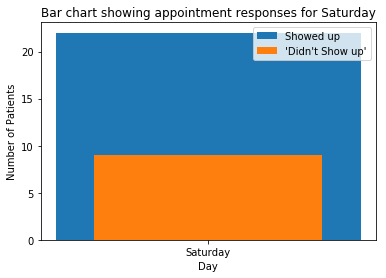

In [209]:
#create a bar plot for saturday to see if there is a trend 
dow = ['Saturday']
fig1 = plt.bar(dow, df_show.apt_dow.value_counts()[dow[0]], label='Showed up')

fig1 = plt.bar(dow, df_no_show.apt_dow.value_counts()[dow[0]], label="'Didn't Show up'", width=0.6)

plt.title("Bar chart showing appointment responses for Saturday")
plt.xlabel("Day")
plt.ylabel("Number of Patients")
plt.legend();

> The same ratio is observed for saturday, hence day of the week cannot be used to firmly determine possibility of patients showing up

### 5. Does the age of a patient show a measure of probability for showing up?

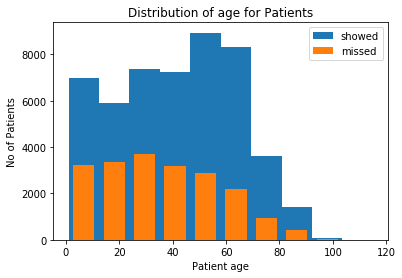

In [210]:
#plot distribution of age of patients for each response
plt.hist(df_show.age, label= 'showed')
plt.hist(df_no_show.age, rwidth=0.7, label= 'missed')
plt.xlabel('Patient age')
plt.ylabel('No of Patients')
plt.legend()
plt.title("Distribution of age for Patients");

> The distribution above doesn't show a clear distinction between patients that showed up and those that didn,t show up, hence no prediction can be made using this feature. A scatter plot would be used to verify this inference

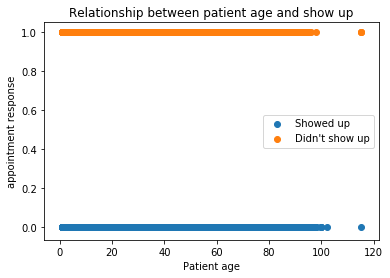

In [211]:
#scatter plot for patient age
plt.scatter(df_show.age, df_show.no_show_numeric, label='Showed up')
plt.scatter(df_no_show.age, df_no_show.no_show_numeric, label="Didn't show up")
plt.title("Relationship between patient age and show up")
plt.xlabel("Patient age")
plt.ylabel("appointment response")
plt.legend();

> The scatter plot above also doess'nt show a reasonable distinction for prediction to be made based on this feature

### 6. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

To answer this question, we run bar plots across the remaing columns

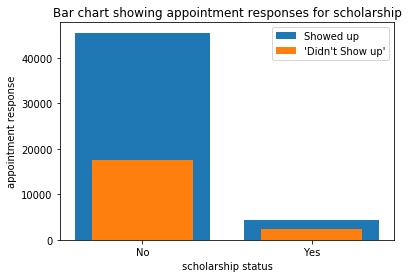

In [212]:
#create plot for scholarship column
bar_chart('scholarship')

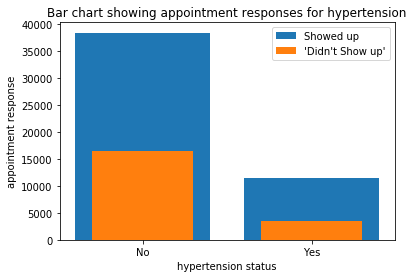

In [213]:
#create plot for hypertension column
bar_chart('hypertension')

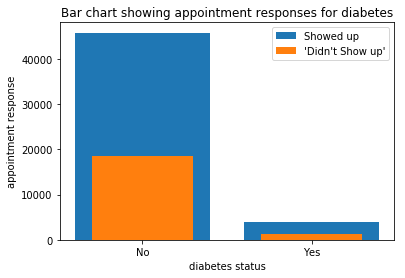

In [214]:
#create plot for diabetes column
bar_chart('diabetes')

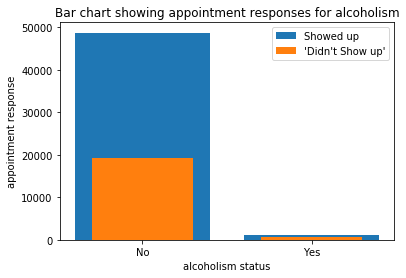

In [215]:
#create plot for alcoholism column 
bar_chart('alcoholism')

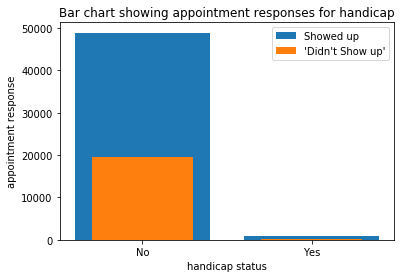

In [216]:
#create plot for handicap column
bar_chart('handicap')

> The plot above shows that there is no clear distinction using the features plotted above. The final option would be to run some analysis considering multiple features in a dataframe by creating masks for:
1. sick patients (hypertension and diabetes)
2. sick patients with disability (hypertension, diabetes and handicap)
3. sick patients with disability and no scholarship

A simple check would be to run value counts of the "no_show" column on each dataframe to see if there is a clear and wide enough margin

In [217]:
#masks for sick patients
df_sick = df.query('hypertension==1 & diabetes==1')
df_sick.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,apt_dow,apt_gap,no_show_numeric
44,F,78,0,1,1,0,0,0,Yes,Friday,0,1
47,F,39,0,1,1,0,0,0,No,Friday,0,0
73,F,68,0,1,1,0,0,1,No,Friday,22,0
112,F,59,0,1,1,0,0,1,No,Friday,10,0
127,M,42,0,1,1,0,0,1,No,Friday,20,0


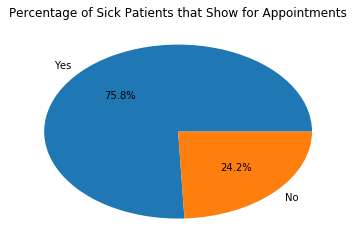

In [218]:
# Create a pie chart to show the percentage 
plot_array = [df_sick.no_show_numeric.value_counts()[0], df_sick.no_show_numeric.value_counts()[1]]
labels = ['Yes', 'No']
plt.pie(plot_array, labels = labels, autopct='%1.1f%%')
plt.title("Percentage of Sick Patients that Show for Appointments");

In [219]:
#masks for sick patients with disability
df_sick_disab = df.query('hypertension==1 & diabetes==1  & handicap==1' )
df_sick_disab.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,apt_dow,apt_gap,no_show_numeric
238,F,65,0,1,1,0,1,1,No,Friday,2,0
935,M,69,0,1,1,0,1,1,No,Friday,43,0
954,M,84,0,1,1,0,1,1,No,Friday,114,0
971,F,69,0,1,1,0,1,1,No,Friday,69,0
1538,F,35,0,1,1,0,1,0,No,Friday,36,0


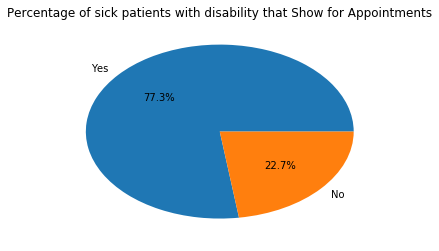

In [220]:
# Create a pie chart to show the percentage 
plot_array = [df_sick_disab.no_show_numeric.value_counts()[0], df_sick_disab.no_show_numeric.value_counts()[1]]
labels = ['Yes', 'No']
plt.pie(plot_array, labels = labels, autopct='%1.1f%%')
plt.title("Percentage of sick patients with disability that Show for Appointments");

In [221]:
#masks for sick patients with disability and no scholarship
df_show_sick_disab_non_sch = df.query('hypertension==1 & diabetes==1  & handicap==0 & scholarship ==0' )
df_show_sick_disab_non_sch.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,apt_dow,apt_gap,no_show_numeric
44,F,78,0,1,1,0,0,0,Yes,Friday,0,1
47,F,39,0,1,1,0,0,0,No,Friday,0,0
73,F,68,0,1,1,0,0,1,No,Friday,22,0
112,F,59,0,1,1,0,0,1,No,Friday,10,0
127,M,42,0,1,1,0,0,1,No,Friday,20,0


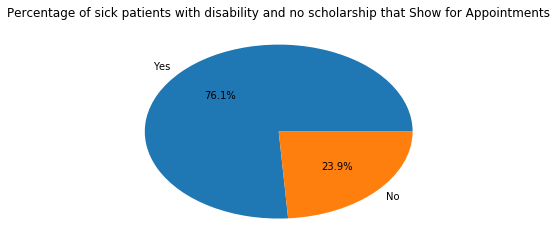

In [222]:
# Create a pie chart to show the percentage 
plot_array = [df_show_sick_disab_non_sch.no_show_numeric.value_counts()[0], df_show_sick_disab_non_sch.no_show_numeric.value_counts()[1]]
labels = ['Yes', 'No']
plt.pie(plot_array, labels = labels, autopct='%1.1f%%')
plt.title("Percentage of sick patients with disability and no scholarship that Show for Appointments");

 > All three cases show very similar percentages of patients response to appointments, hence we this multivariate approach yields an answer that there are no features we can use to predict if a patient would show up or not

<a id='conclusions'></a>
## Conclusions

1. 28.5% of appointments are not shown up for, this is a large number and should be a cause for investigation. 
2. The number of days between scheduling and appointment does not show a trend to predict possibility of show up.
3. Sending sms to patients does not improve chances of patients showing up.
4. The day of the week of an appointment does not affect chances of showing up. 
5. The age of a patient does not give adequate information as to wether a patient would show up for their appointment.
6. Generally, no feature investigated gives enough information to predict the possibilty of a patient showing up for appointments. 

> **Limitation**: The column showing neighbourhood could have provided some insight if there was data for classification of the neighbourhoods. 

In [225]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0